In [4]:
import GPyOpt
from GPyOpt.methods import BayesianOptimization
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
from numba import njit

In [5]:
bounds = [{'name': 'mu_1', 'type': 'continuous', 'domain': (0,100)},
         {'name': 'mu_2', 'type': 'continuous', 'domain': (0,100)}
         ]


constraints = [
    {'name': 'constr_1', 'constraint': 'x[:,1]+x[:,0]-100'},
    {'name': 'constr_2', 'constraint': '-x[:,1]+np.sqrt(6/5)'},
]

In [18]:
@njit
def sumation(t):
    return np.sum(t)

def f(X):
    db = np.empty((len(X),1))
    for i in range(len(X)):
        lower, upper = X[0]

    t = st.uniform(lower,upper).rvs(10000)
    return sumation(t)

In [19]:
#Determine the subset where we are allowed to sample
feasible_region = GPyOpt.Design_space(space = bounds, constraints = constraints) 
initial_design = GPyOpt.experiment_design.initial_design('random', feasible_region, 10)

#CHOOSE the objective
objective = GPyOpt.core.task.SingleObjective(f)

# CHOOSE the model type
model = GPyOpt.models.GPModel(exact_feval=True,optimize_restarts=10,verbose=False)

#CHOOSE the acquisition optimizer
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(feasible_region)

#CHOOSE the type of acquisition
acquisition = GPyOpt.acquisitions.AcquisitionEI(model, feasible_region, optimizer=aquisition_optimizer)

#CHOOSE a collection method
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

In [29]:
bo = GPyOpt.methods.ModularBayesianOptimization(model, feasible_region, objective, acquisition, evaluator, initial_design)

TypeError: __init__() got an unexpected keyword argument 'num_cores'

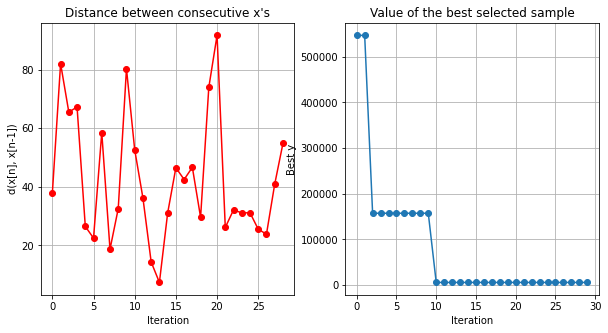

CPU times: user 57.3 s, sys: 26.2 s, total: 1min 23s
Wall time: 22.2 s


In [21]:
%%time

# --- Stop conditions
max_time  = None 
max_iter  = 20
tolerance = 1e-8     # distance between two consecutive observations 
                     # if we're sampling a region in such fine detail then it is likely that we've found the true min.

# Run the optimization                                                  
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance, verbosity=False) 
bo.plot_convergence()

In [95]:
bo.Y

array([[547011.78650483],
       [882143.45515671],
       [157140.50001917],
       [715782.18242665],
       [199216.89187954],
       [483137.77207484],
       [697460.95679478],
       [494944.99008689],
       [581544.81549117],
       [423886.5032852 ],
       [  5484.96731767],
       [585308.82270316],
       [526123.14687214],
       [380495.22215223],
       [302523.06980854],
       [ 37609.07864524],
       [554295.14127918],
       [315361.84531867],
       [118059.10357091],
       [383953.10968936],
       [498327.77649048],
       [ 41591.20622788],
       [172490.94399104],
       [ 10790.56104274],
       [310757.00703063],
       [ 12342.94020728],
       [297279.63599043],
       [473400.86584227],
       [132943.44912968],
       [743417.64515618]])

In [28]:
objective_true.f([[1,2],[2,1]])

array([[21.62763539],
       [11.449983  ]])

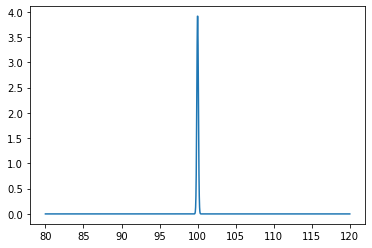

In [21]:
x = np.linspace(80,120,1000)
plt.plot(x,st.norm.pdf(x,100,0.1))

In [30]:
a = st.norm(0,10).rvs(10_000)
b = st.norm(10,10).rvs(10_000)

In [68]:
def unwrap(X):
    return np.asarray(list(zip(*X)))

In [76]:
@njit
def unwrap_fast(X):
    db = np.empty((len(X[0]), len(X)))
    for i in range(len(X[0])):
        for j in range(len(X)):
            db[i,j] = X[j][i]
    return db

In [78]:
%%time
unwrap_fast([a,b])

CPU times: user 13.3 ms, sys: 0 ns, total: 13.3 ms
Wall time: 13.2 ms


array([[ -6.22929295,  10.66898874],
       [ -7.92946223,  -1.1901492 ],
       [  8.08719451,  34.52837551],
       ...,
       [ -6.91888826,  -3.39348298],
       [ -3.82816   ,  19.7448766 ],
       [ -2.43477423, -11.97432394]])

In [69]:
%%time
unwrap([a,b,a,b])

CPU times: user 14.9 ms, sys: 0 ns, total: 14.9 ms
Wall time: 18.6 ms


array([[ -6.22929295,  10.66898874,  -6.22929295,  10.66898874],
       [ -7.92946223,  -1.1901492 ,  -7.92946223,  -1.1901492 ],
       [  8.08719451,  34.52837551,   8.08719451,  34.52837551],
       ...,
       [ -6.91888826,  -3.39348298,  -6.91888826,  -3.39348298],
       [ -3.82816   ,  19.7448766 ,  -3.82816   ,  19.7448766 ],
       [ -2.43477423, -11.97432394,  -2.43477423, -11.97432394]])

In [80]:
from pycallgraph import PyCallGraph
from pycallgraph.output import GraphvizOutput

with PyCallGraph(output=GraphvizOutput()):
    unwrap_fast([a,b,a,b])

In [81]:
import pstats

In [91]:
p = pstats.Stats('Performance/Execution_before_optimization.stats')
p.sort_stats('cumtime').print_stats(100)

Wed Apr 21 11:09:56 2021    Performance/Execution_before_optimization.stats

         6034509 function calls (5999287 primitive calls) in 7.045 seconds

   Ordered by: cumulative time
   List reduced from 2707 to 100 due to restriction <100>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      120    0.005    0.000    7.053    0.059 /mnt/c/Users/Mathias/Documents/dev/Thesis_code/attacker/parse.py:75(inner)
      120    0.682    0.006    4.017    0.033 /mnt/c/Users/Mathias/Documents/dev/Thesis_code/attacker/parse.py:54(make_output)
  1200000    0.704    0.000    3.334    0.000 test2.py:9(wrapper)
  1200000    2.525    0.000    2.525    0.000 {built-in method builtins.sum}
      120    0.005    0.000    2.440    0.020 /mnt/c/Users/Mathias/Documents/dev/Thesis_code/attacker/parse.py:78(<listcomp>)
     1320    0.002    0.000    1.459    0.001 /home/maoj/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:835(__call__)
     1320    0.003    0.0

In [92]:
p = pstats.Stats('Performance/Execution_optimizing_sum.stats')
p.sort_stats('cumtime').print_stats(100)

Wed Apr 21 11:17:51 2021    Performance/Execution_optimizing_sum.stats

         3917687 function calls (3864217 primitive calls) in 5.498 seconds

   Ordered by: cumulative time
   List reduced from 2962 to 100 due to restriction <100>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      120    0.005    0.000    5.529    0.046 /mnt/c/Users/Mathias/Documents/dev/Thesis_code/attacker/parse.py:75(inner)
      120    0.012    0.000    2.722    0.023 /mnt/c/Users/Mathias/Documents/dev/Thesis_code/attacker/parse.py:78(<listcomp>)
      120    1.665    0.014    2.217    0.018 /mnt/c/Users/Mathias/Documents/dev/Thesis_code/attacker/parse.py:54(make_output)
     1320    0.002    0.000    1.768    0.001 /home/maoj/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:835(__call__)
     1320    0.004    0.000    1.766    0.001 /home/maoj/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:818(freeze)
     1320    0.056    0.000    1

In [94]:
p = pstats.Stats('Performance/Execution_opt-v3.stats')
p.sort_stats('cumtime').print_stats(1000)

Wed Apr 21 11:31:21 2021    Performance/Execution_opt-v3.stats

         2904099 function calls (2838447 primitive calls) in 3.419 seconds

   Ordered by: cumulative time
   List reduced from 3014 to 1000 due to restriction <1000>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      120    0.006    0.000    3.427    0.029 /mnt/c/Users/Mathias/Documents/dev/Thesis_code/attacker/parse.py:76(inner)
      120    0.005    0.000    2.328    0.019 /mnt/c/Users/Mathias/Documents/dev/Thesis_code/attacker/parse.py:79(<listcomp>)
     1320    0.002    0.000    1.457    0.001 /home/maoj/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:835(__call__)
     1320    0.002    0.000    1.455    0.001 /home/maoj/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:818(freeze)
     1320    0.014    0.000    1.453    0.001 /home/maoj/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:432(__init__)
     1320    0.037    

     1961    0.001    0.000    0.009    0.000 /home/maoj/.local/lib/python3.8/site-packages/numba/core/ir.py:594(list_vars)
       20    0.003    0.000    0.009    0.000 /home/maoj/.local/lib/python3.8/site-packages/numba/core/postproc.py:175(_patch_var_dels)
      267    0.001    0.000    0.009    0.000 /home/maoj/.local/lib/python3.8/site-packages/numba/core/cgutils.py:866(gep_inbounds)
4836/2942    0.003    0.000    0.009    0.000 /usr/lib/python3.8/abc.py:100(__subclasscheck__)
        1    0.000    0.000    0.009    0.009 /home/maoj/.local/lib/python3.8/site-packages/cffi/cparser.py:1(<module>)
      281    0.001    0.000    0.009    0.000 /home/maoj/.local/lib/python3.8/site-packages/numba/core/cgutils.py:873(gep)
        5    0.000    0.000    0.009    0.002 /home/maoj/.local/lib/python3.8/site-packages/numba/core/typed_passes.py:181(run_pass)
      203    0.001    0.000    0.009    0.000 /home/maoj/.local/lib/python3.8/site-packages/numba/core/base.py:47(find)
        5    0.00

        3    0.000    0.000    0.003    0.001 /home/maoj/.local/lib/python3.8/site-packages/numba/np/arrayobj.py:510(array_len)
      621    0.002    0.000    0.003    0.000 /home/maoj/.local/lib/python3.8/site-packages/numba/core/types/functions.py:247(__init__)
       55    0.000    0.000    0.003    0.000 /home/maoj/.local/lib/python3.8/site-packages/llvmlite/binding/context.py:8(get_global_context)
        5    0.000    0.000    0.003    0.001 /home/maoj/.local/lib/python3.8/site-packages/numba/core/lowering.py:255(setup_function)
      111    0.000    0.000    0.003    0.000 /home/maoj/.local/lib/python3.8/site-packages/llvmlite/binding/ffi.py:250(__exit__)
       19    0.000    0.000    0.003    0.000 /home/maoj/.local/lib/python3.8/site-packages/numba/core/pythonapi.py:1362(serialize_object)
      216    0.000    0.000    0.003    0.000 /usr/lib/python3/dist-packages/pkg_resources/__init__.py:1407(_get_metadata_path)
       61    0.000    0.000    0.003    0.000 /usr/lib/python3

       21    0.000    0.000    0.001    0.000 /home/maoj/.local/lib/python3.8/site-packages/numba/core/rewrites/static_getitem.py:147(match)
      121    0.001    0.000    0.001    0.000 /home/maoj/.local/lib/python3.8/site-packages/numba/core/analysis.py:91(liveness)
       24    0.000    0.000    0.001    0.000 /home/maoj/.local/lib/python3.8/site-packages/numba/core/types/misc.py:71(maybe_literal)
       59    0.000    0.000    0.001    0.000 /home/maoj/.local/lib/python3.8/site-packages/llvmlite/ir/builder.py:588(icmp_unsigned)
       66    0.000    0.000    0.001    0.000 /usr/lib/python3.8/posixpath.py:372(abspath)
        9    0.000    0.000    0.001    0.000 /home/maoj/.local/lib/python3.8/site-packages/numba/core/datamodel/packer.py:87(as_arguments)
     7528    0.001    0.000    0.001    0.000 {built-in method time.perf_counter}
        1    0.000    0.000    0.001    0.001 /home/maoj/.local/lib/python3.8/site-packages/numba/core/typing/setdecl.py:1(<module>)
     1288    0.0

       26    0.000    0.000    0.001    0.000 /home/maoj/.local/lib/python3.8/site-packages/numba/core/cgutils.py:662(<listcomp>)
        1    0.000    0.000    0.001    0.001 /home/maoj/.local/lib/python3.8/site-packages/pycparser/c_ast.py:19(<module>)
        5    0.000    0.000    0.001    0.000 /home/maoj/.local/lib/python3.8/site-packages/numba/core/typed_passes.py:796(_strip_phi_nodes)
        6    0.000    0.000    0.001    0.000 /home/maoj/.local/lib/python3.8/site-packages/numba/core/removerefctpass.py:51(valid_input)
        1    0.000    0.000    0.001    0.001 /home/maoj/.local/lib/python3.8/site-packages/numba/core/imputils.py:144(res)


